In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Jobs_NYC_Postings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5544 non-null   int64  
 1   Agency                         5544 non-null   object 
 2   Posting Type                   5544 non-null   object 
 3   # Of Positions                 5544 non-null   int64  
 4   Business Title                 5544 non-null   object 
 5   Civil Service Title            5544 non-null   object 
 6   Title Classification           5544 non-null   object 
 7   Title Code No                  5544 non-null   object 
 8   Level                          5544 non-null   object 
 9   Job Category                   5544 non-null   object 
 10  Full-Time/Part-Time indicator  5415 non-null   object 
 11  Career Level                   5544 non-null   object 
 12  Salary Range From              5544 non-null   f

In [4]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,616636,DEPARTMENT OF CORRECTION,External,1,Chief Dietitian,DIETITIAN,Competitive-1,50310,03,Health Social Services,...,The City of New York offers a comprehensive be...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is not required.,11/20/2023,NaN,11/20/2023,02/05/2024
1,610652,DEPT OF HEALTH/MENTAL HYGIENE,External,1,",Director of Compliance, Office of the Agency ...",ADMIN CONTRACT SPECIALIST (PYR,Competitive-1,10095,M2,"Finance, Accounting, & Procurement",...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,10/12/2023,09-FEB-2024,10/13/2023,02/05/2024
2,611455,BRONX DISTRICT ATTORNEY,External,10,Crime Victim Advocate,COMMUNITY ASSOCIATE,Non-Competitive-5,56057,00,Constituent Services & Community Programs Heal...,...,NaN,We appreciate your interest in a position with...,NaN,NaN,NaN,City Residency is not required for this position,10/16/2023,15-OCT-2024,10/16/2023,02/05/2024
3,536654,HRA/DEPT OF SOCIAL SERVICES,Internal,1,RESEARCH ANALYST,ASSOCIATE STAFF ANALYST,Competitive-1,12627,00,"Administration & Human Resources Finance, Acco...",...,"The Salary Range for this vacancy: $70,611.00...",APPLICANTS MUST BE PERMANENT IN THE ASSOCIATE ...,NaN,NaN,NaN,New York City residency is generally required ...,07/08/2022,NaN,07/08/2022,02/05/2024
4,595903,HRA/DEPT OF SOCIAL SERVICES,Internal,1,REVENUE BUDGET ASSOCIATE,PRINCIPAL ADMINISTRATIVE ASSOC,Competitive-1,10124,03,"Finance, Accounting, & Procurement",...,**LOAN FORGIVENESS The federal government pro...,PLEASE NOTE APPLICANTS MUST BE PERMANENT IN TH...,9:00AM to 5:00PM,4 World Trade Center,NaN,New York City residency is generally required ...,08/01/2023,NaN,08/01/2023,02/05/2024


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     129
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          36
Preferred Skills                 1255
Additional Information           2132
To Apply                          477
Hours/Shift                      3532
Work Location 1                  3557
Recruitment Contact              5544
Residency Requirement               0
Posting Date

In [6]:
columns_to_remove = ['Recruitment Contact', 'Post Until', 'Hours/Shift', 'Work Location 1', 'To Apply',]
df = df.drop(columns=columns_to_remove)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5544 non-null   int64  
 1   Agency                         5544 non-null   object 
 2   Posting Type                   5544 non-null   object 
 3   # Of Positions                 5544 non-null   int64  
 4   Business Title                 5544 non-null   object 
 5   Civil Service Title            5544 non-null   object 
 6   Title Classification           5544 non-null   object 
 7   Title Code No                  5544 non-null   object 
 8   Level                          5544 non-null   object 
 9   Job Category                   5544 non-null   object 
 10  Full-Time/Part-Time indicator  5415 non-null   object 
 11  Career Level                   5544 non-null   object 
 12  Salary Range From              5544 non-null   f

In [8]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Residency Requirement,Posting Date,Posting Updated,Process Date
0,616636,DEPARTMENT OF CORRECTION,External,1,Chief Dietitian,DIETITIAN,Competitive-1,50310,03,Health Social Services,...,Rikers Island,Nutritional Services,The New York City Department of Correction (DO...,Qualification Requirements 1. A baccalaureate...,â¢\tAbility to read and write English and to ...,The City of New York offers a comprehensive be...,New York City residency is not required.,11/20/2023,11/20/2023,02/05/2024
1,610652,DEPT OF HEALTH/MENTAL HYGIENE,External,1,",Director of Compliance, Office of the Agency ...",ADMIN CONTRACT SPECIALIST (PYR,Competitive-1,10095,M2,"Finance, Accounting, & Procurement",...,42-09 28th Street,Acco/Contracts,*** Open to candidates that are permanent Admi...,1. A baccalaureate degree from an accredited c...,"- Excellent analytical, written, oral and inte...",NaN,New York City residency is generally required ...,10/12/2023,10/13/2023,02/05/2024
2,611455,BRONX DISTRICT ATTORNEY,External,10,Crime Victim Advocate,COMMUNITY ASSOCIATE,Non-Competitive-5,56057,00,Constituent Services & Community Programs Heal...,...,198 E161St Street Bronx N.Y.,Support Staff,The Bronx District Attorneyâs Office is seek...,Qualification Requirements 1. High school gra...,NaN,NaN,City Residency is not required for this position,10/16/2023,10/16/2023,02/05/2024
3,536654,HRA/DEPT OF SOCIAL SERVICES,Internal,1,RESEARCH ANALYST,ASSOCIATE STAFF ANALYST,Competitive-1,12627,00,"Administration & Human Resources Finance, Acco...",...,"250 Church St., N.Y.",Office Of Revenue/Admin-NM,"The Investigation, Revenue, and Enforcement Ad...",1. A masterâs degree from an accredited coll...,â¢\tExcellent organizational skills with the ...,"The Salary Range for this vacancy: $70,611.00...",New York City residency is generally required ...,07/08/2022,07/08/2022,02/05/2024
4,595903,HRA/DEPT OF SOCIAL SERVICES,Internal,1,REVENUE BUDGET ASSOCIATE,PRINCIPAL ADMINISTRATIVE ASSOC,Competitive-1,10124,03,"Finance, Accounting, & Procurement",...,4 World Trade Center,Budget Administration-NM,The Office of Budget Administration (OBA) is r...,1. A baccalaureate degree from an accredited c...,â¢\tExtensive Budget experience â¢\tStrong r...,**LOAN FORGIVENESS The federal government pro...,New York City residency is generally required ...,08/01/2023,08/01/2023,02/05/2024


In [9]:
popular_categories = df['Job Category'].value_counts()[:5]
popular_categories

Engineering, Architecture, & Planning    774
Technology, Data & Innovation            394
Social Services                          365
Finance, Accounting, & Procurement       354
Building Operations & Maintenance        306
Name: Job Category, dtype: int64

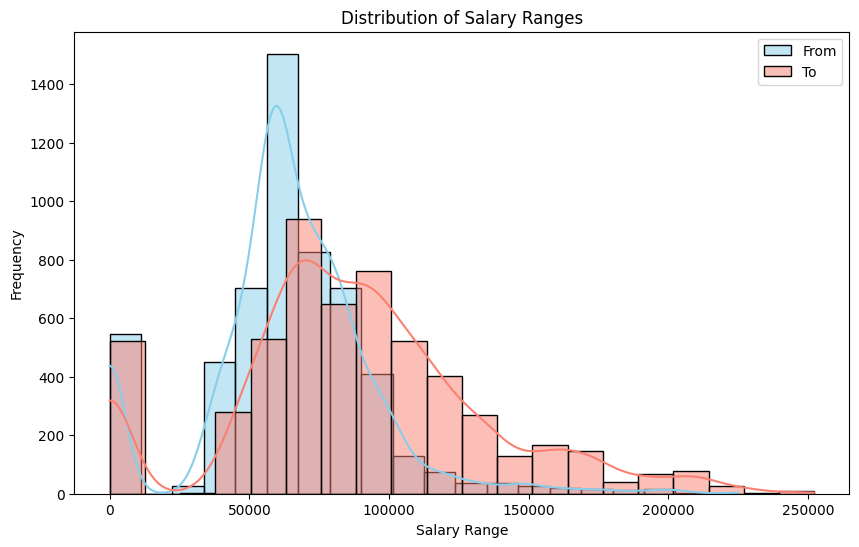

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Salary Range From", bins=20, kde=True, color='skyblue', label='From')
sns.histplot(data=df, x="Salary Range To", bins=20, kde=True, color='salmon', label='To')
plt.title("Distribution of Salary Ranges")
plt.xlabel("Salary Range")
plt.ylabel("Frequency")
plt.legend()
plt.show()

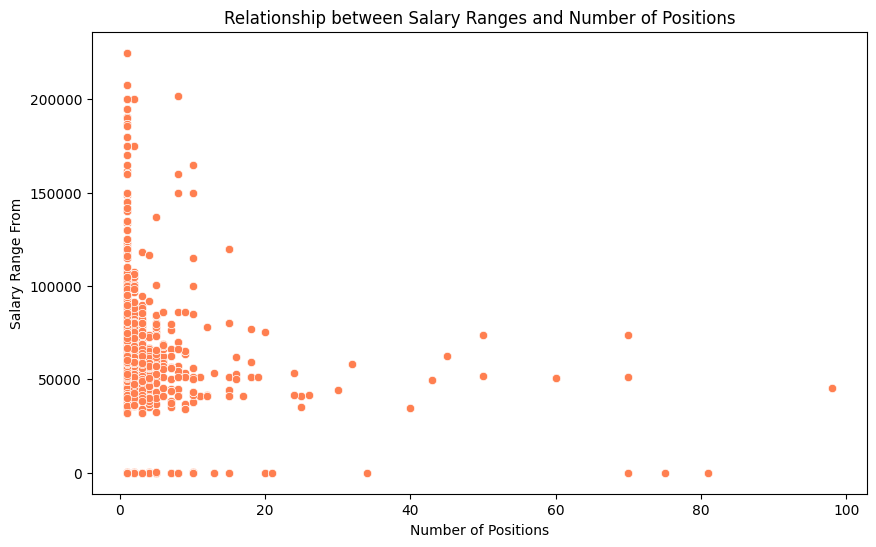

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="# Of Positions", y="Salary Range From", color='coral')
plt.title("Relationship between Salary Ranges and Number of Positions")
plt.xlabel("Number of Positions")
plt.ylabel("Salary Range From")
plt.show()

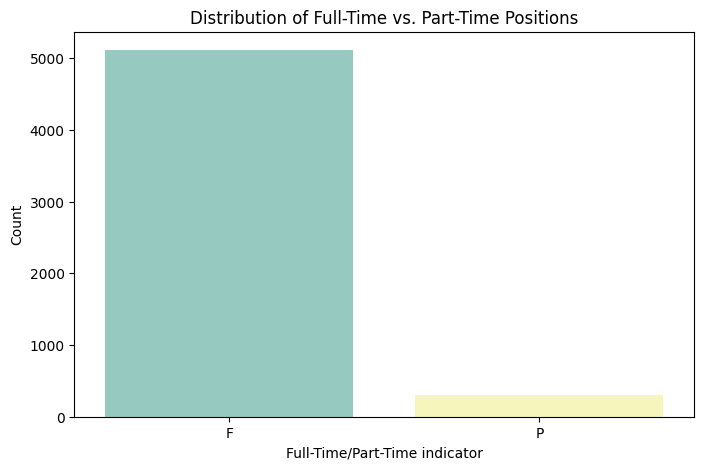

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Full-Time/Part-Time indicator", palette="Set3")
plt.title("Distribution of Full-Time vs. Part-Time Positions")
plt.xlabel("Full-Time/Part-Time indicator")
plt.ylabel("Count")
plt.show()

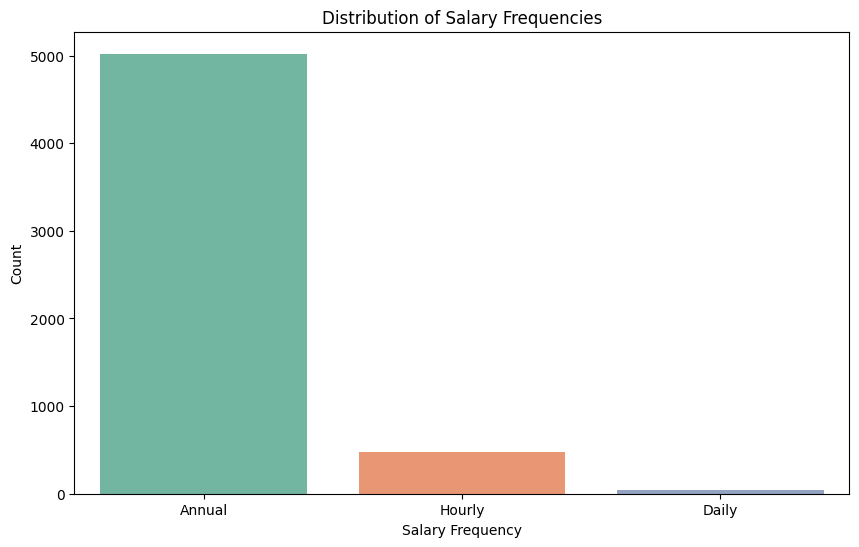

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Salary Frequency", palette="Set2")
plt.title("Distribution of Salary Frequencies")
plt.xlabel("Salary Frequency")
plt.ylabel("Count")
plt.show()

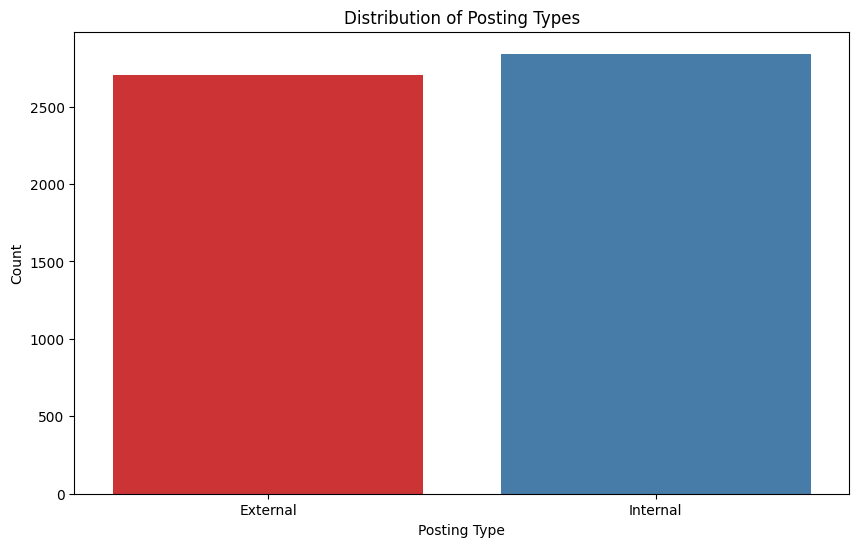

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Posting Type", palette="Set1")
plt.title("Distribution of Posting Types")
plt.xlabel("Posting Type")
plt.ylabel("Count")
plt.show()

In [15]:
def convert_to_annual(row):
    if row['Salary Frequency'] == 'Hourly':
        annual_from = row['Salary Range From'] * 40 * 52
        annual_to = row['Salary Range To'] * 40 * 52
    elif row['Salary Frequency'] == 'Daily':
        annual_from = row['Salary Range From'] * 260
        annual_to = row['Salary Range To'] * 260
    elif row['Salary Frequency'] == 'Weekly':
        annual_from = row['Salary Range From'] * 52
        annual_to = row['Salary Range To'] * 52
    else:  # Assume the rest are already in annual format
        annual_from = row['Salary Range From']
        annual_to = row['Salary Range To']
    return pd.Series([annual_from, annual_to])
# Apply the function to each row in the DataFrame
df[['Annual Salary From', 'Annual Salary To']] = df.apply(convert_to_annual, axis=1)

# Calculate the average of these annual salaries
df['Average Salary'] = (df['Annual Salary From'] + df['Annual Salary To']) / 2

In [16]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'Residency Requirement', 'Posting Date',
       'Posting Updated', 'Process Date', 'Annual Salary From',
       'Annual Salary To', 'Average Salary'],
      dtype='object')

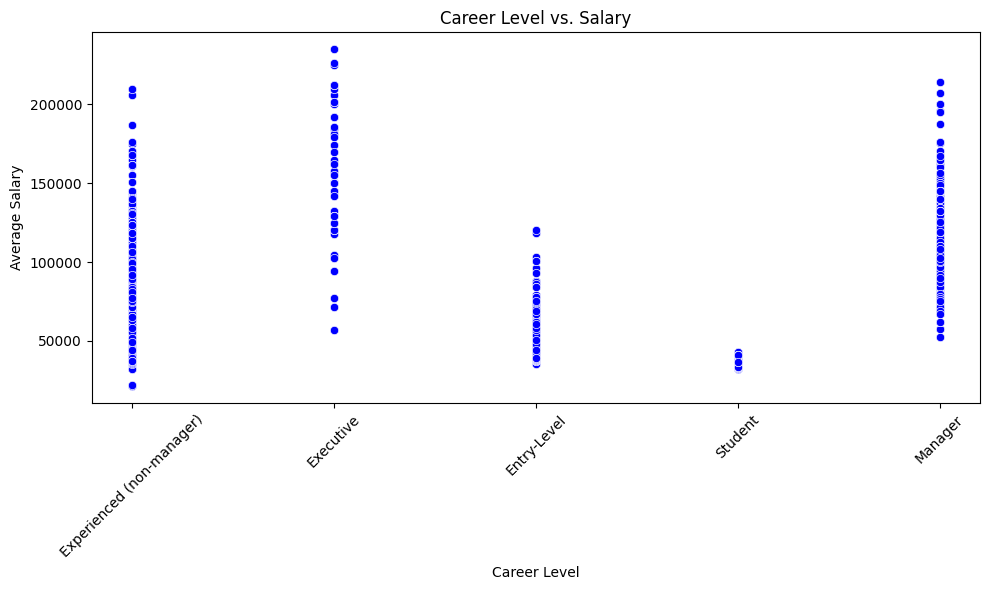

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Career Level', y='Average Salary', color='blue')
plt.title('Career Level vs. Salary')
plt.xlabel('Career Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

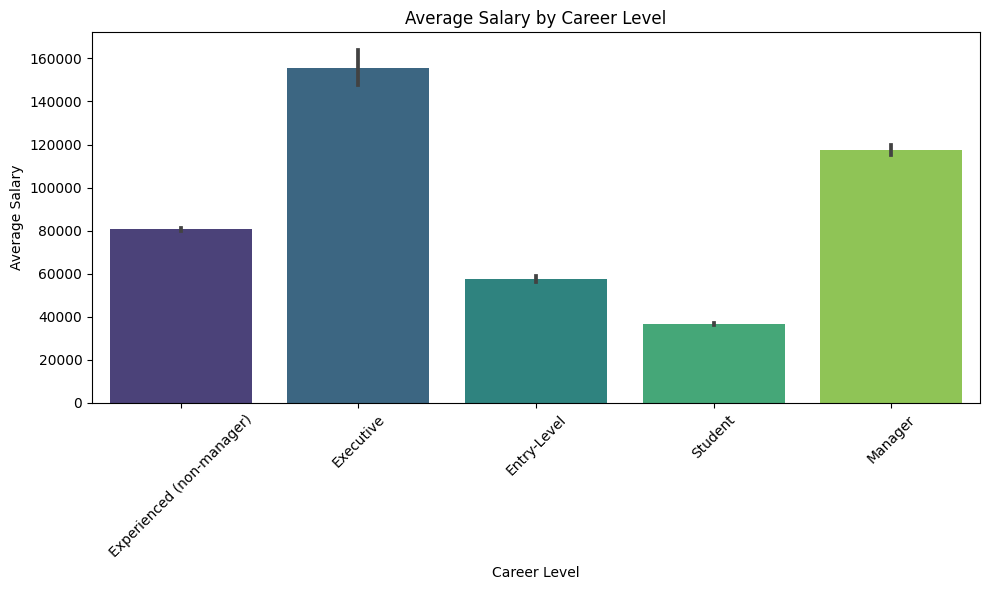

In [18]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Career Level', y='Average Salary', palette='viridis')
plt.title('Average Salary by Career Level')
plt.xlabel('Career Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

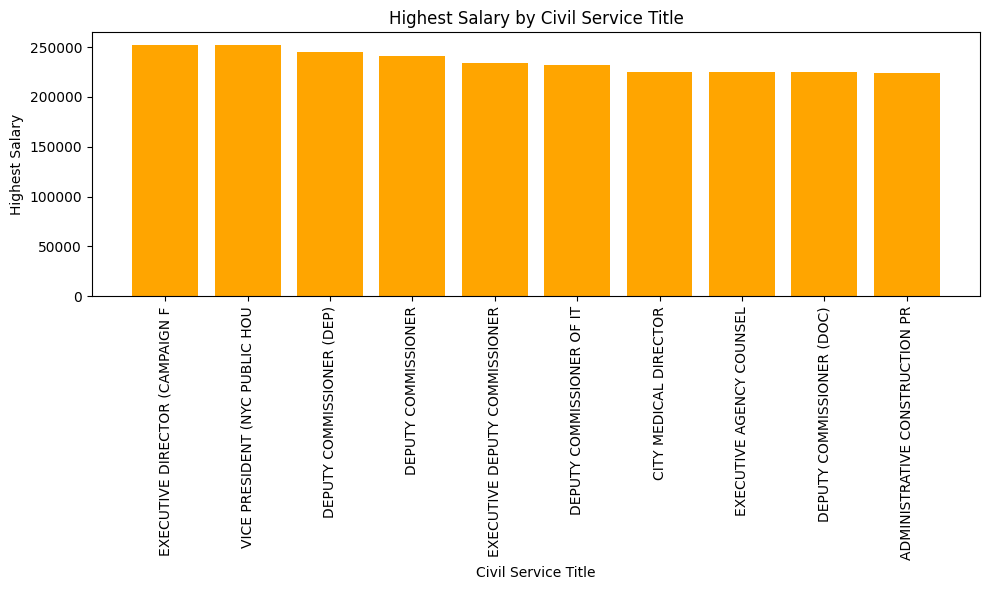

In [19]:
max_salary_by_title = df.groupby('Civil Service Title')['Salary Range To'].max().reset_index()

# Sorting the data by maximum salary in descending order
max_salary_by_title = max_salary_by_title.sort_values(by='Salary Range To', ascending=False).head(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(max_salary_by_title['Civil Service Title'], max_salary_by_title['Salary Range To'], color='orange')
plt.xlabel('Civil Service Title')
plt.ylabel('Highest Salary')
plt.title('Highest Salary by Civil Service Title')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

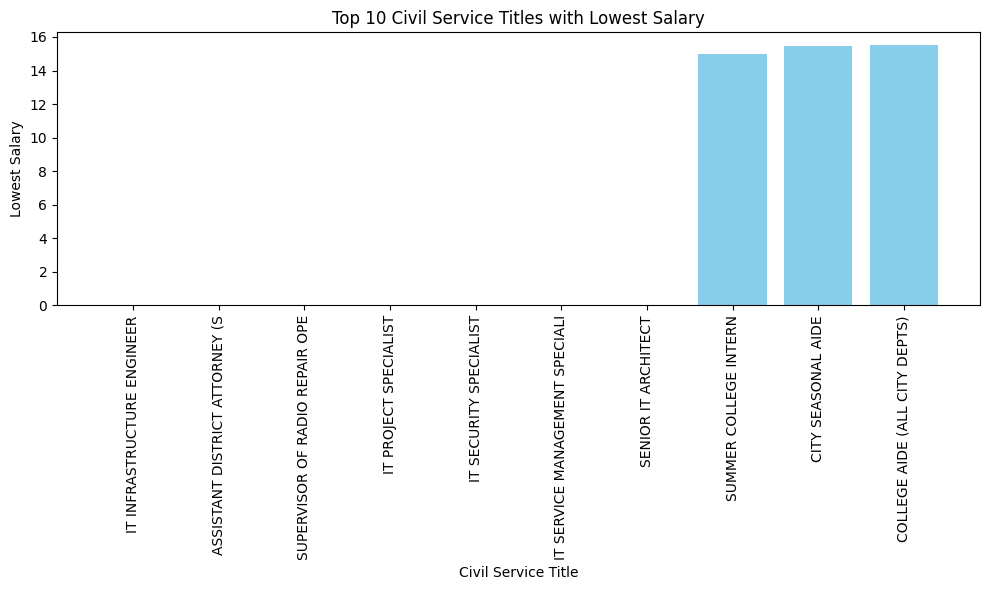

In [20]:
min_salary_by_title = df.groupby('Civil Service Title')['Salary Range From'].min().reset_index()

# Sorting the data by minimum salary in ascending order and selecting top 10
min_salary_by_title = min_salary_by_title.sort_values(by='Salary Range From', ascending=True).head(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(min_salary_by_title['Civil Service Title'], min_salary_by_title['Salary Range From'], color='skyblue')
plt.xlabel('Civil Service Title')
plt.ylabel('Lowest Salary')
plt.title('Top 10 Civil Service Titles with Lowest Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

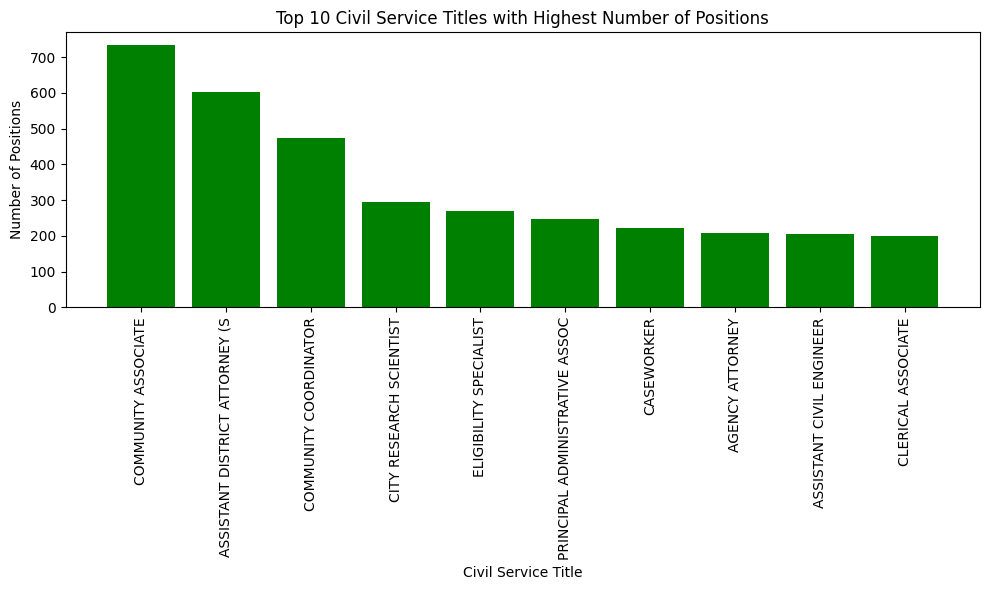

In [21]:
positions_by_title = df.groupby('Civil Service Title')['# Of Positions'].sum().reset_index()

# Sorting the data by number of positions in descending order and selecting top 10
top_positions_by_title = positions_by_title.sort_values(by='# Of Positions', ascending=False).head(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_positions_by_title['Civil Service Title'], top_positions_by_title['# Of Positions'], color='green')
plt.xlabel('Civil Service Title')
plt.ylabel('Number of Positions')
plt.title('Top 10 Civil Service Titles with Highest Number of Positions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

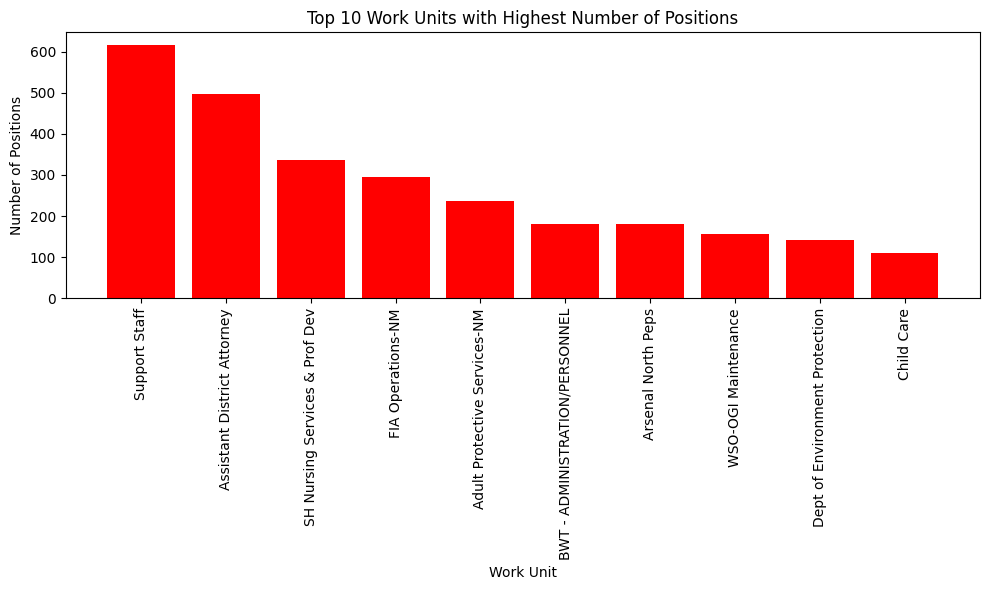

In [22]:
positions_by_work_unit = df.groupby('Division/Work Unit')['# Of Positions'].sum().reset_index()

# Sorting the data by number of positions in descending order and selecting top 10
top_positions_by_work_unit = positions_by_work_unit.sort_values(by='# Of Positions', ascending=False).head(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_positions_by_work_unit['Division/Work Unit'], top_positions_by_work_unit['# Of Positions'], color='red')
plt.xlabel('Work Unit')
plt.ylabel('Number of Positions')
plt.title('Top 10 Work Units with Highest Number of Positions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [23]:
# pip install chart_studio

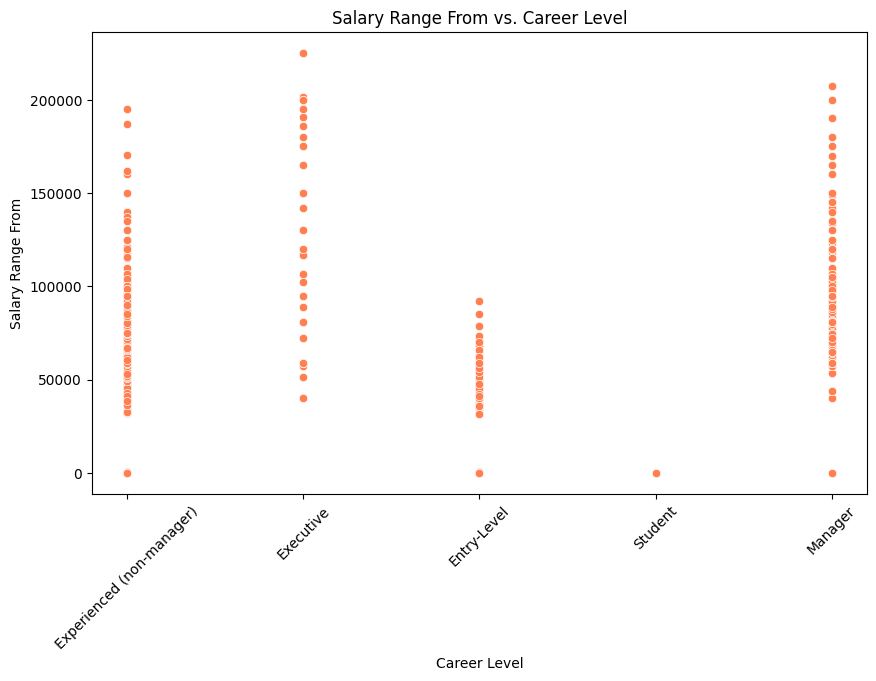

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Career Level", y="Salary Range From", color='coral')
plt.title("Salary Range From vs. Career Level")
plt.xlabel("Career Level")
plt.ylabel("Salary Range From")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [25]:
engineering_jobs = df[df['Job Category'] == 'Engineering, Architecture, & Planning']

# Group the engineering jobs by business title and calculate the sum of positions for each title
engineering_job_counts = engineering_jobs.groupby('Business Title')['# Of Positions'].sum()

# Sort the engineering job counts in descending order and select the top 10
top_10_engineering_jobs = engineering_job_counts.sort_values(ascending=False).head(10)

# Display the information
print("Top 10 Engineering Jobs by Count:")
print(top_10_engineering_jobs)

Top 10 Engineering Jobs by Count:
Business Title
Project Manager                     72
Civil Engineering Intern            60
Design Engineer                     56
Assistant Process Engineer          50
Junior Engineer (Design)            46
Deputy Director                     40
Environmental Engineering Intern    38
Assistant Civil Engineer            30
Assistant Team Leader               30
Senior Project Manager              28
Name: # Of Positions, dtype: int64


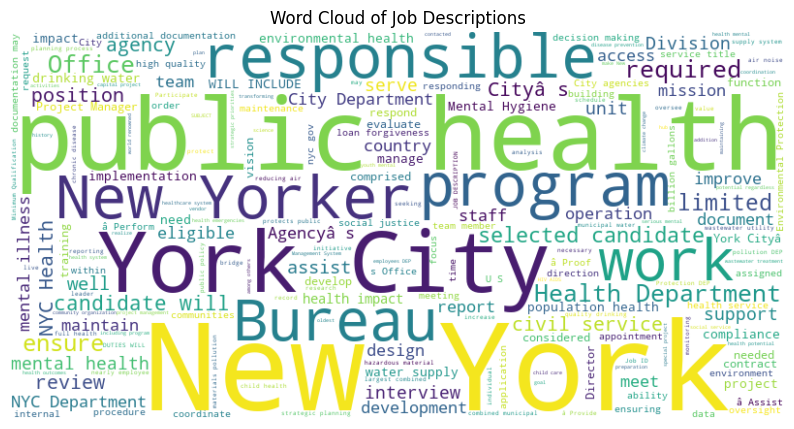

In [26]:
from wordcloud import WordCloud

# Combine all job descriptions into a single string
all_descriptions = ' '.join(df['Job Description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()

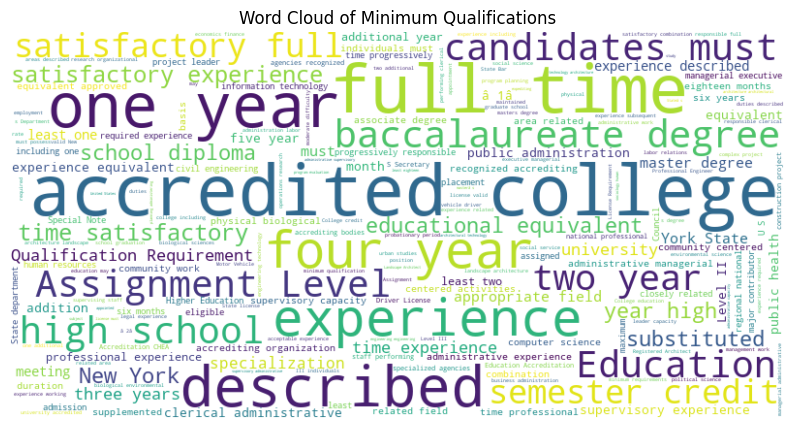

In [27]:
all_min_qualifications = ' '.join(df['Minimum Qual Requirements'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_min_qualifications)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Minimum Qualifications')
plt.show()

It can be seen that around a year's experience and a college degree seem to be the most important factors, projects equivalent of the given experience seem to be a valid assumption too.

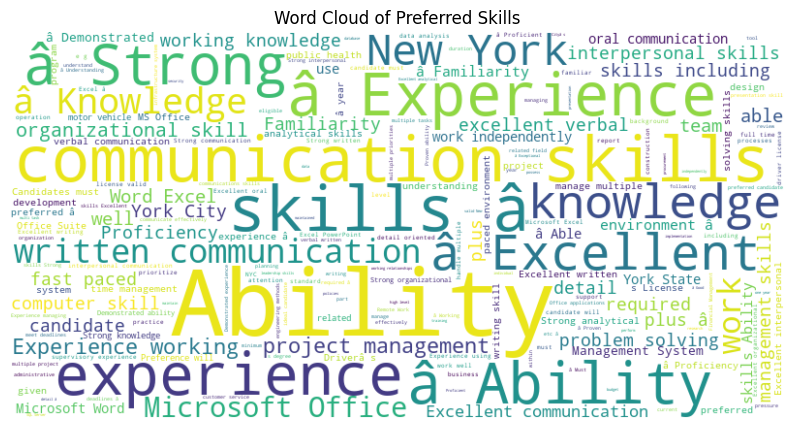

In [28]:
all_preferred_skills = ' '.join(df['Preferred Skills'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_preferred_skills)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preferred Skills')
plt.show()

From the wordcloud, we can notice that Experience, Microsoft Office, Enginering and analytical skills, along with projects are probably the most important factors a candidate must have for a good impact at the opening

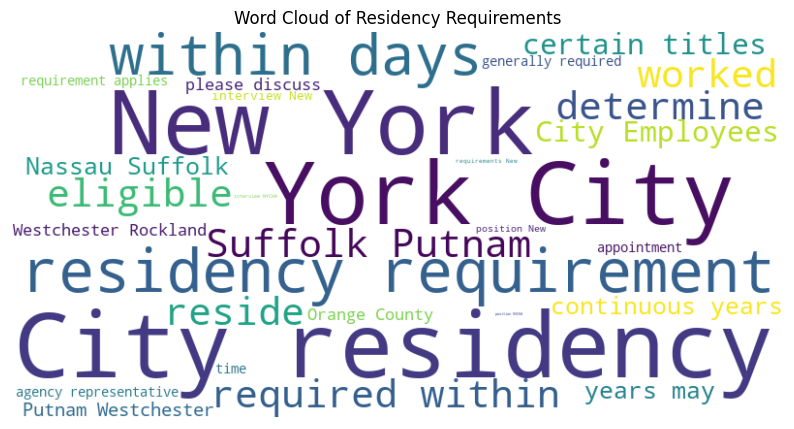

In [29]:
all_residency_requirements = ' '.join(df['Residency Requirement'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_residency_requirements)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Residency Requirements')
plt.show()

According to the given wordcloud, it can be seen that the data is not that conclusive, yet, we can also see that usually, residency is required in the city, and sometimes, in a particular area too. It is logical for the company to look within the city.

In [30]:
features_to_include = ['Level', 'Career Level', 'Full-Time/Part-Time indicator', 
                    'Title Classification', 'Agency', 'Posting Type', 'Average Salary']

# Create a new DataFrame with only the specified features
df = df[features_to_include].copy()

# Display the first few rows of the new DataFrame
print(df.head())

  Level               Career Level Full-Time/Part-Time indicator  \
0    03  Experienced (non-manager)                             F   
1    M2  Experienced (non-manager)                             F   
2    00  Experienced (non-manager)                             F   
3    00  Experienced (non-manager)                             F   
4    03  Experienced (non-manager)                             F   

  Title Classification                         Agency Posting Type  \
0        Competitive-1       DEPARTMENT OF CORRECTION     External   
1        Competitive-1  DEPT OF HEALTH/MENTAL HYGIENE     External   
2    Non-Competitive-5        BRONX DISTRICT ATTORNEY     External   
3        Competitive-1    HRA/DEPT OF SOCIAL SERVICES     Internal   
4        Competitive-1    HRA/DEPT OF SOCIAL SERVICES     Internal   

   Average Salary  
0         61331.0  
1         81461.0  
2         50000.0  
3         87874.5  
4         71010.5  


In [31]:
missing_values = df.isnull().sum()
print(missing_values)

Level                              0
Career Level                       0
Full-Time/Part-Time indicator    129
Title Classification               0
Agency                             0
Posting Type                       0
Average Salary                     0
dtype: int64


In [32]:
df = df.dropna(subset=['Full-Time/Part-Time indicator'])

In [33]:
missing_values = df.isnull().sum()
print(missing_values)

Level                            0
Career Level                     0
Full-Time/Part-Time indicator    0
Title Classification             0
Agency                           0
Posting Type                     0
Average Salary                   0
dtype: int64


In [34]:
print(df.dtypes)

Level                             object
Career Level                      object
Full-Time/Part-Time indicator     object
Title Classification              object
Agency                            object
Posting Type                      object
Average Salary                   float64
dtype: object


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Full-Time/Part-Time indicator'] = label_encoder.fit_transform(df['Full-Time/Part-Time indicator'])
df['Posting Type'] = label_encoder.fit_transform(df['Posting Type'])

In [36]:
from category_encoders import TargetEncoder
import category_encoders as ce

In [37]:
# Target Encoding
target_encoder = ce.TargetEncoder(cols=['Level', 'Title Classification', 'Agency'])
df[['Level', 'Title Classification', 'Agency']] = target_encoder.fit_transform(
    df[['Level', 'Title Classification', 'Agency']], df['Average Salary']
)

In [38]:
df['Career Level'].value_counts()

Experienced (non-manager)    4045
Manager                       579
Entry-Level                   483
Student                       212
Executive                      96
Name: Career Level, dtype: int64

In [39]:
career_level_mapping = {
    'Student': 0,
    'Entry-Level': 1,
    'Experienced (non-manager)': 2,
    'Manager': 3,
    'Executive': 4
}
df['Career Level'] = df['Career Level'].map(career_level_mapping)

In [40]:
df['Level']

0        86734.467725
1       109840.811270
2        76939.556157
3        76939.556157
4        86734.467725
            ...      
5539     76939.556157
5540     78163.611156
5541     76939.556157
5542     64784.673990
5543     78163.611156
Name: Level, Length: 5415, dtype: float64

In [41]:
df['Full-Time/Part-Time indicator'] = df['Full-Time/Part-Time indicator'].astype(float)
df['Posting Type'] = df['Posting Type'].astype(float)
df['Career Level'] = df['Career Level'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5543
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Level                          5415 non-null   float64
 1   Career Level                   5415 non-null   float64
 2   Full-Time/Part-Time indicator  5415 non-null   float64
 3   Title Classification           5415 non-null   float64
 4   Agency                         5415 non-null   float64
 5   Posting Type                   5415 non-null   float64
 6   Average Salary                 5415 non-null   float64
dtypes: float64(7)
memory usage: 338.4 KB


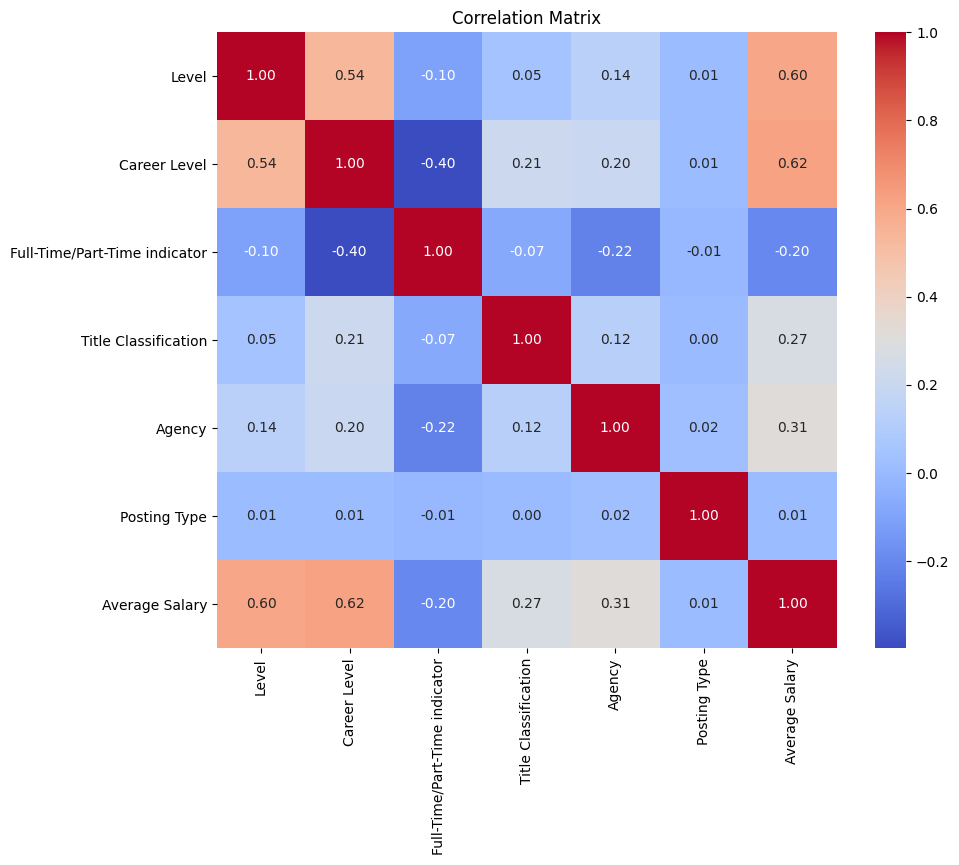

In [42]:
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

In [43]:
# Calculate correlation between each encoded categorical feature and the target variable ("Average Salary")
correlation_with_salary = df.corr()['Average Salary']

# Print correlation values
print(correlation_with_salary)

Level                            0.604521
Career Level                     0.619657
Full-Time/Part-Time indicator   -0.198331
Title Classification             0.272220
Agency                           0.314713
Posting Type                     0.007560
Average Salary                   1.000000
Name: Average Salary, dtype: float64


In [44]:
# Remove the specified columns from the DataFrame
df = df.drop(columns=['Posting Type'])

# Display the first few rows of the updated DataFrame
print(df.head())

           Level  Career Level  Full-Time/Part-Time indicator  \
0   86734.467725           2.0                            0.0   
1  109840.811270           2.0                            0.0   
2   76939.556157           2.0                            0.0   
3   76939.556157           2.0                            0.0   
4   86734.467725           2.0                            0.0   

   Title Classification         Agency  Average Salary  
0          82255.463360  105101.046822         61331.0  
1          82255.463360   74122.688455         81461.0  
2          79108.972107   94445.541782         50000.0  
3          82255.463360   76071.119783         87874.5  
4          82255.463360   76071.119783         71010.5  


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define X (features) and y (target variable)
X = df.drop(columns=['Average Salary'])
y = df['Average Salary']

# Split the dataset into training and testing sets (75% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
from sklearn.preprocessing import RobustScaler
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate metrics
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)

# Print metrics
print("Linear Regression Metrics:")
print("  MAE:", lr_mae)
print("  MSE:", lr_mse)
print("  RMSE:", lr_rmse)
print("  R2 Score: ", lr_r2)

Linear Regression Metrics:
  MAE: 15069.991760062912
  MSE: 388612129.3595198
  RMSE: 19713.247559941
  R2 Score:  0.5755803239950729


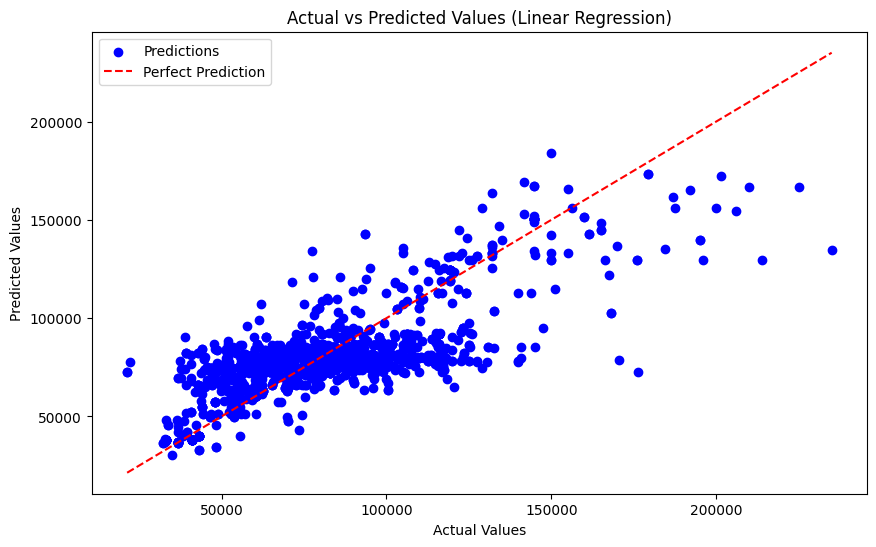

In [48]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [49]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

# Print metrics
print("Random Forest Metrics:")
print("  MAE:", rf_mae)
print("  MSE:", rf_mse)
print("  RMSE:", rf_rmse)
print("  R2 Score: ", rf_r2)

Random Forest Metrics:
  MAE: 10932.588061531866
  MSE: 261698917.29299283
  RMSE: 16177.110906864453
  R2 Score:  0.7141875888655627


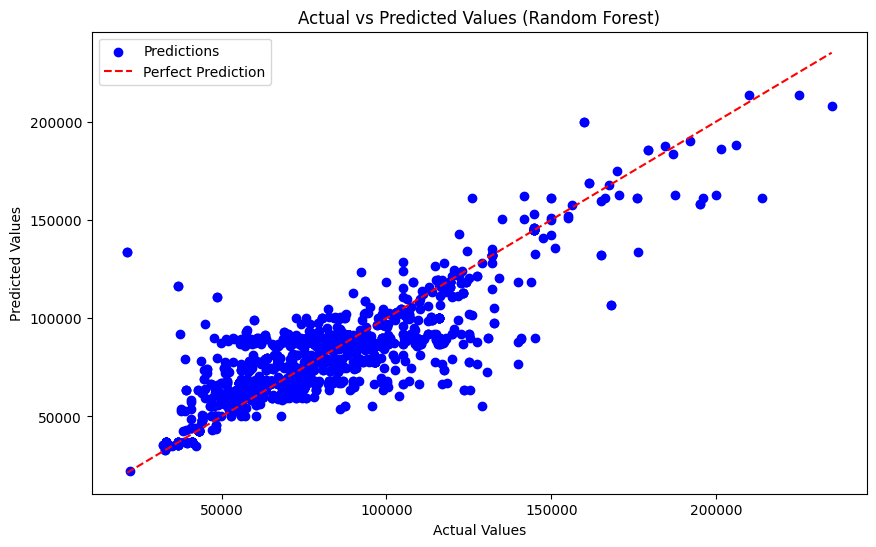

In [50]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [51]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Calculate metrics
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
knn_r2 = r2_score(y_test, knn_predictions)

# Print metrics
print("KNN Metrics:")
print("  MAE:", knn_mae)
print("  MSE:", knn_mse)
print("  RMSE:", knn_rmse)
print("  R2 Score: ", knn_r2)

KNN Metrics:
  MAE: 12491.275744165436
  MSE: 335105594.70444477
  RMSE: 18305.889617946592
  R2 Score:  0.634017064350761


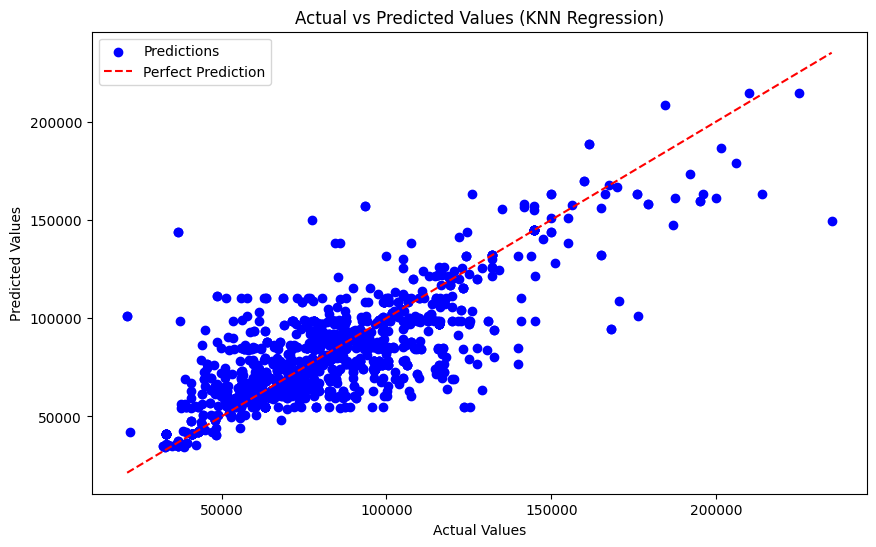

In [52]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (KNN Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [53]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [54]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred = poly_reg.predict(X_test_poly)

In [55]:
pr_mae = mean_absolute_error(y_test, y_pred)
pr_mse = mean_squared_error(y_test, y_pred)
pr_rmse = np.sqrt(pr_mse)  # RMSE is the square root of MSE
pr_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", pr_mae)
print("Mean Squared Error (MSE):", pr_mse)
print("Root Mean Squared Error (RMSE):", pr_rmse)
print("R-squared (R2) Score:", pr_r2)

Mean Absolute Error (MAE): 14665.06937095283
Mean Squared Error (MSE): 362447497.64047873
Root Mean Squared Error (RMSE): 19038.053935223492
R-squared (R2) Score: 0.6041558204297459


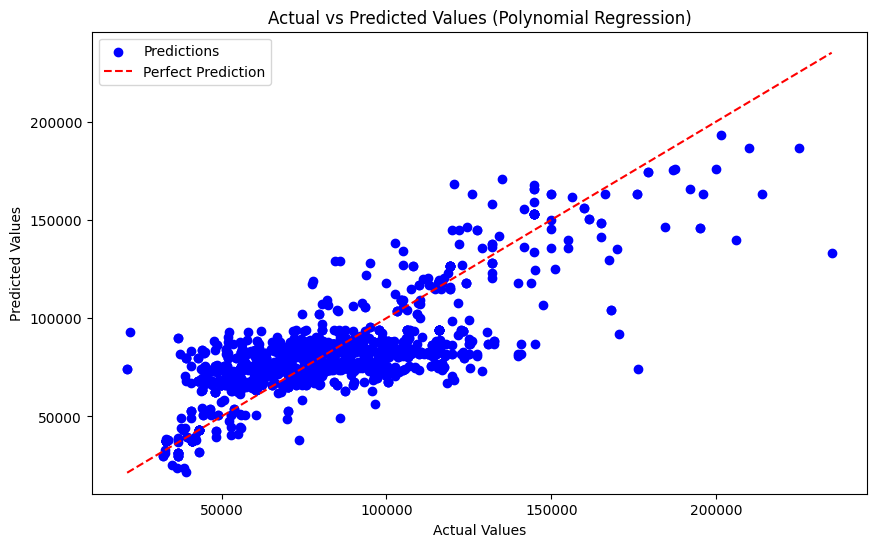

In [56]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

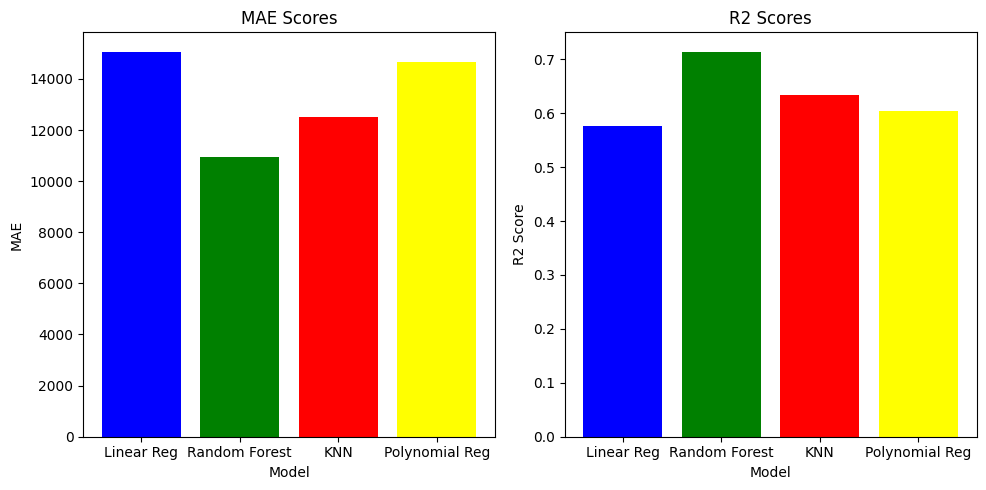

In [57]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Reg', 'Random Forest', 'KNN', 'Polynomial Reg']

# MAE scores
mae_scores = [lr_mae, rf_mae, knn_mae, pr_mae]

# R2 scores
r2_scores = [lr_r2, rf_r2, knn_r2, pr_r2]

# Plotting MAE scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mae_scores, color=['blue', 'green', 'red', 'yellow'])
plt.title('MAE Scores')
plt.ylabel('MAE')
plt.xlabel('Model')

# Plotting R2 scores
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'yellow'])
plt.title('R2 Scores')
plt.ylabel('R2 Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

In [58]:
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

In [59]:
print("Random Forest Feature Importance:")
print(feature_importance_df)

Random Forest Feature Importance:
                         Feature  Importance
0                          Level    0.547797
1                   Career Level    0.187999
4                         Agency    0.169408
3           Title Classification    0.072549
2  Full-Time/Part-Time indicator    0.022246


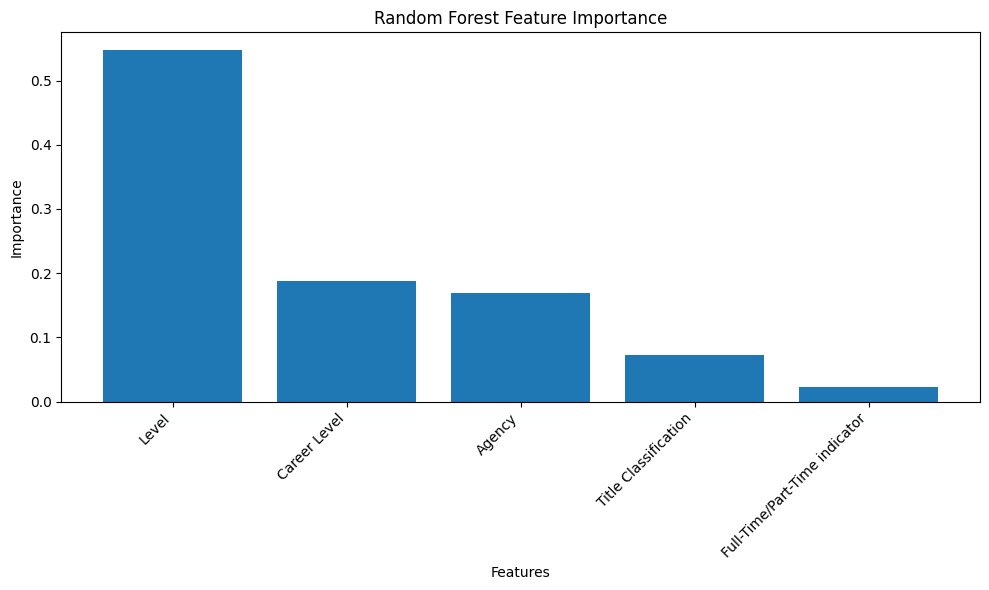

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()